In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/Flight/2018.csv')

In [ ]:
df1 = df[0:2000000]

In [ ]:
df1.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.tail()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
1999995,2018-04-15,UA,304,BOS,IAH,515,512.0,-3.0,12.0,524.0,813.0,5.0,829,818.0,-11.0,0.0,NaN,0.0,254.0,246.0,229.0,1597.0,NaN,NaN,NaN,NaN,NaN,NaN
1999996,2018-04-15,UA,303,DEN,LGA,1028,1040.0,12.0,44.0,1124.0,1752.0,4.0,1613,1756.0,103.0,0.0,NaN,0.0,225.0,316.0,268.0,1620.0,0.0,0.0,103.0,0.0,0.0,NaN
1999997,2018-04-15,UA,302,MCO,EWR,600,558.0,-2.0,11.0,609.0,808.0,5.0,834,813.0,-21.0,0.0,NaN,0.0,154.0,135.0,119.0,937.0,NaN,NaN,NaN,NaN,NaN,NaN
1999998,2018-04-15,UA,301,DEN,LAS,1126,1122.0,-4.0,26.0,1148.0,1220.0,7.0,1221,1227.0,6.0,0.0,NaN,0.0,115.0,125.0,92.0,628.0,NaN,NaN,NaN,NaN,NaN,NaN
1999999,2018-04-15,UA,300,SFO,HNL,1315,1315.0,0.0,19.0,1334.0,1536.0,3.0,1539,1539.0,0.0,0.0,NaN,0.0,324.0,324.0,302.0,2398.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(4897307, 28)

In [ ]:
df1['Unnamed: 27'].nunique

<bound method IndexOpsMixin.nunique of 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1999995   NaN
1999996   NaN
1999997   NaN
1999998   NaN
1999999   NaN
Name: Unnamed: 27, Length: 2000000, dtype: float64>

In [ ]:
df1.drop(['Unnamed: 27'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897307 entries, 0 to 4897306
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [ ]:
df1.drop(df1[df1['CANCELLED'] ==1].index, inplace = True)

In [ ]:
df1.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Delay
0,2018-01-01,UA,EWR,DEN,1517,-5.0,15.0,1527.0,1712.0,10.0,1745,0.0,0.0,268.0,250.0,225.0,1605.0,0
1,2018-01-01,UA,LAS,SFO,1115,-8.0,11.0,1118.0,1223.0,7.0,1254,0.0,0.0,99.0,83.0,65.0,414.0,0
2,2018-01-01,UA,SNA,DEN,1335,-5.0,15.0,1345.0,1631.0,5.0,1649,0.0,0.0,134.0,126.0,106.0,846.0,0
3,2018-01-01,UA,RSW,ORD,1546,6.0,19.0,1611.0,1748.0,6.0,1756,0.0,0.0,190.0,182.0,157.0,1120.0,0
4,2018-01-01,UA,ORD,ALB,630,20.0,13.0,703.0,926.0,10.0,922,0.0,0.0,112.0,106.0,83.0,723.0,1


In [ ]:
df1.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,4.805501e+06,4.805501e+06,4.805501e+06,4.800758e+06,4.805501e+06,4.805501e+06,4.803610e+06,4.803610e+06,4.805501e+06,4.803610e+06,4.790042e+06,4805500.0,4.805500e+06,4.805493e+06,4.792639e+06,4.792639e+06,4.805500e+06,946598.000000,946598.000000,946598.000000,946598.000000,946598.000000
mean,2.566190e+03,1.329867e+03,1.335473e+03,1.080000e+01,1.744042e+01,1.359124e+03,1.458711e+03,7.627106e+00,1.483053e+03,1.463068e+03,5.779945e+00,0.0,2.676100e-03,1.418882e+02,1.368671e+02,1.118136e+02,8.056411e+02,19.661320,3.862312,16.089194,0.083159,26.452975
std,1.852913e+03,4.925197e+02,5.074850e+02,4.595180e+01,1.010126e+01,5.092447e+02,5.382005e+02,6.153289e+00,5.213012e+02,5.425536e+02,4.811573e+01,0.0,5.166178e-02,7.383956e+01,7.348569e+01,7.136942e+01,6.013186e+02,58.831494,30.178283,36.979862,2.793034,50.492968
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.140000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.060000e+02,0.0,0.000000e+00,-6.000000e+01,1.400000e+01,7.000000e+00,3.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.860000e+02,9.120000e+02,9.150000e+02,-5.000000e+00,1.100000e+01,9.310000e+02,1.041000e+03,4.000000e+00,1.059000e+03,1.046000e+03,-1.400000e+01,0.0,0.000000e+00,8.900000e+01,8.300000e+01,6.000000e+01,3.640000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.075000e+03,1.320000e+03,1.327000e+03,-2.000000e+00,1.500000e+01,1.341000e+03,1.501000e+03,6.000000e+00,1.514000e+03,1.504000e+03,-6.000000e+00,0.0,0.000000e+00,1.230000e+02,1.180000e+02,9.300000e+01,6.400000e+02,0.000000,0.000000,2.000000,0.000000,4.000000
75%,4.036000e+03,1.735000e+03,1.746000e+03,8.000000e+00,2.000000e+01,1.802000e+03,1.911000e+03,9.000000e+00,1.918000e+03,1.916000e+03,8.000000e+00,0.0,0.000000e+00,1.720000e+02,1.670000e+02,1.410000e+02,1.041000e+03,17.000000,0.000000,19.000000,0.000000,33.000000
max,7.439000e+03,2.359000e+03,2.400000e+03,2.710000e+03,1.780000e+02,2.400000e+03,2.400000e+03,2.580000e+02,2.400000e+03,2.400000e+03,2.692000e+03,0.0,1.000000e+00,7.040000e+02,7.570000e+02,6.960000e+02,4.983000e+03,2007.000000,2692.000000,1848.000000,927.000000,2454.000000


In [ ]:
df1 = df1.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'OP_CARRIER_FL_NUM', 'CANCELLATION_CODE'], axis=1)

In [ ]:
df1.drop(columns = ['DEP_TIME', 'ARR_TIME'], inplace = True)

In [ ]:
df1.drop(columns = ['OP_CARRIER', 'ORIGIN', 'DEST'], inplace = True)

In [ ]:
df1.drop(columns = ['FL_DATE'], inplace = True)

In [ ]:
df1.shape

(1952689, 19)

In [ ]:
df1.isna().sum()

FL_DATE                      0
OP_CARRIER                   0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_DELAY                 4743
TAXI_OUT                     0
WHEELS_OFF                   0
WHEELS_ON                 1891
TAXI_IN                   1891
CRS_ARR_TIME                 0
ARR_DELAY                15459
CANCELLED                    1
CANCELLATION_CODE      4805501
DIVERTED                     1
CRS_ELAPSED_TIME             8
ACTUAL_ELAPSED_TIME      12862
AIR_TIME                 12862
DISTANCE                     1
dtype: int64

In [ ]:
print('Missing values:', df1.isna().sum().sum())

Missing values: 1971057


In [ ]:
df1["DEP_DELAY"] = df1["DEP_DELAY"].fillna(0)
df1.isna().sum()

FL_DATE                   0
CRS_DEP_TIME              0
DEP_DELAY                 0
TAXI_OUT                  0
WHEELS_OFF                0
WHEELS_ON              1102
TAXI_IN                1102
CRS_ARR_TIME              0
ARR_DELAY              5410
CANCELLED                 0
DIVERTED                  0
CRS_ELAPSED_TIME          7
ACTUAL_ELAPSED_TIME    4428
AIR_TIME               4428
DISTANCE                  0
dtype: int64

In [ ]:
df1["TAXI_IN"].fillna((df1['TAXI_IN'].mean()), inplace = True)

In [ ]:
df1["ARR_DELAY"].fillna((df1['ARR_DELAY'].mean()), inplace = True)

In [ ]:
df1.corr()

,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
CRS_DEP_TIME,1.000000,0.079175,-0.052323,0.945099,0.660406,-0.058986,0.686446,0.065578,NaN,-0.007011,-0.025143,-0.031483,-0.020276,-0.013059
DEP_DELAY,0.079175,1.000000,0.057077,0.117834,0.042823,0.002540,0.069826,0.953398,NaN,0.016603,0.002781,0.006572,-0.001427,0.000638
TAXI_OUT,-0.052323,0.057077,1.000000,-0.016646,-0.017119,0.026296,-0.026069,0.228046,NaN,0.015392,0.073957,0.182672,0.044822,0.027713
WHEELS_OFF,0.945099,0.117834,-0.016646,1.000000,0.696621,-0.054727,0.697942,0.109420,NaN,-0.005404,-0.036017,-0.037940,-0.032229,-0.029945
WHEELS_ON,0.660406,0.042823,-0.017119,0.696621,1.000000,-0.020445,0.865800,0.037768,NaN,-0.002936,0.015288,0.013841,0.018215,0.014773
TAXI_IN,-0.058986,0.002540,0.026296,-0.054727,-0.020445,1.000000,-0.020884,0.086629,NaN,0.009310,0.101786,0.155256,0.076469,0.066875
CRS_ARR_TIME,0.686446,0.069826,-0.026069,0.697942,0.865800,-0.020884,1.000000,0.058559,NaN,-0.002780,0.017911,0.013114,0.018752,0.016690
ARR_DELAY,0.065578,0.953398,0.228046,0.109420,0.037768,0.086629,0.058559,1.000000,NaN,NaN,-0.039600,0.020512,-0.017822,-0.038452
CANCELLED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIVERTED,-0.007011,0.016603,0.015392,-0.005404,-0.002936,0.009310,-0.002780,NaN,NaN,1.000000,0.012725,NaN,NaN,0.011406


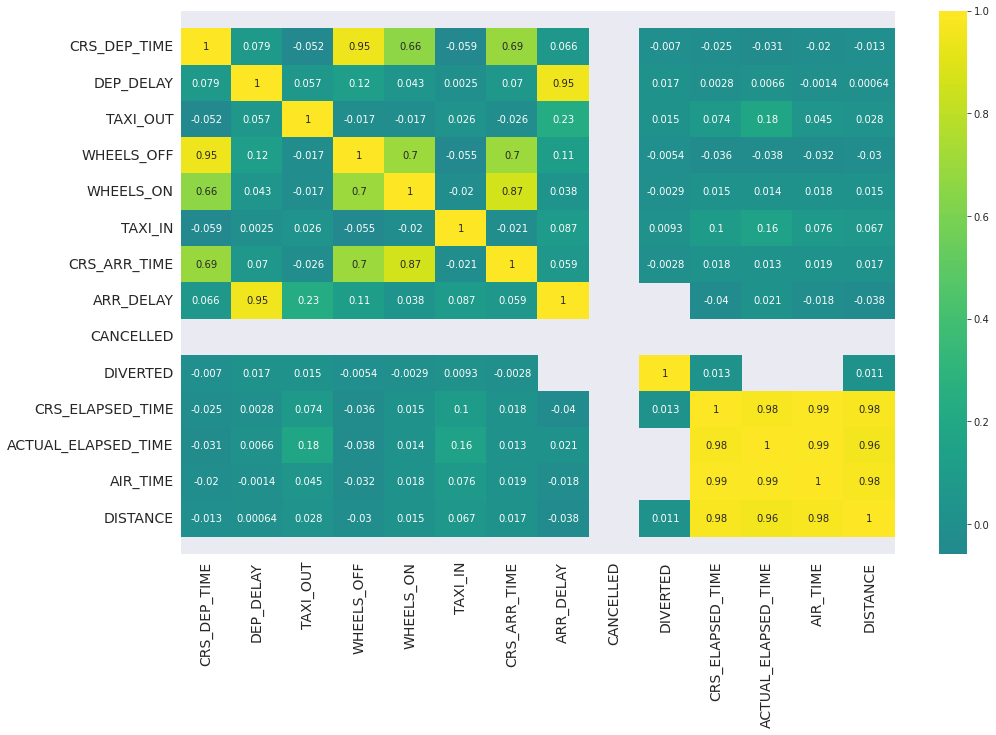

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(df1.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()


In [ ]:
delay =[]

for value in df1['ARR_DELAY']: 

    if value < 1:
        delay.append(0)
    else:
        delay.append(1)  
df1['Delay'] = delay

In [ ]:
df1.drop(columns = ['ARR_DELAY'], inplace = True)

In [ ]:
df1['FL_DATE'] = pd.to_numeric(pd.to_datetime(df1['FL_DATE']))

In [ ]:
df1 = df1.fillna(df1.mean())

In [ ]:
df1.value_counts('Delay')

Delay
0    1280631
1     672058
dtype: int64

In [ ]:
y = df1['Delay']
X = df1.drop(['Delay'], axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [ ]:
cs = DecisionTreeClassifier(criterion="entropy", max_depth=3)
cs = cs.fit(X_train,y_train)

In [ ]:
p = cs.predict(X_test)
print("Accuracy:", roc_auc_score(y_test, p))

Accuracy: 0.7978957811325724


In [ ]:
# Cross Validation
k_folds = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
score = cross_val_score(cs, X, y, cv = k_folds)

In [ ]:
print("Cross Validation Scores: ", score)
print("Average CV Score: ", score.mean())
print("Number of CV Scores used in Average: ", len(score))

Cross Validation Scores:  [0.84850642 0.84745659 0.84612509 0.84678059 0.84730807 0.84706226
 0.84728759 0.84719541 0.84635554 0.84869513]
Average CV Score:  0.8472772681250618
Number of CV Scores used in Average:  10


In [ ]:
cs_clf = classification_report(y_test, p)

In [ ]:
print("Classification Metrics\n\n", cs_clf)

Classification Metrics

               precision    recall  f1-score   support

           0       0.83      0.96      0.89    320072
           1       0.89      0.64      0.74    168101

    accuracy                           0.85    488173
   macro avg       0.86      0.80      0.82    488173
weighted avg       0.85      0.85      0.84    488173



In [ ]:
print('Confusion Matrix\n')
pd.crosstab(y_test, p, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix



Predicted,0,1,All
True,,,
0,306942,13130,320072
1,61052,107049,168101
All,367994,120179,488173


In [ ]:
pd.crosstab(df1['DEP_DELAY'], df1['Delay'])

Delay,0,1
DEP_DELAY,,
-114.0,1,0
-60.0,3,0
-51.0,1,0
-50.0,1,0
-49.0,3,0
...,...,...
1741.0,0,1
1752.0,0,1
2007.0,0,1


In [ ]:
r_forest = RandomForestClassifier(n_estimators=100, max_depth=5)
r_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
r_forest.score(X_test, y_test)

0.8588082503538704

In [ ]:
rf_pred = r_forest.predict(X_test)

In [ ]:
rf_clf = classification_report(y_test, rf_pred)

In [ ]:
print("Classification Metrics\n\n", rf_clf)

Classification Metrics

               precision    recall  f1-score   support

           0       0.85      0.95      0.90    320072
           1       0.88      0.68      0.77    168101

    accuracy                           0.86    488173
   macro avg       0.87      0.82      0.83    488173
weighted avg       0.86      0.86      0.85    488173



In [ ]:
print('Confusion Matrix\n')
pd.crosstab(y_test, rf_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix



Predicted,0,1,All
True,,,
0,304607,15465,320072
1,53797,114304,168101
All,358404,129769,488173


In [ ]:
#Adaboost and Gradient Boosting Models
ada_clf = AdaBoostClassifier(random_state = 42)
grd_clf = GradientBoostingClassifier(random_state = 42)

In [ ]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
grd_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
ada_train_pred = ada_clf.predict(X_train)
ada_test_pred = ada_clf.predict(X_test)

# GradientBoosting model predictions
grd_train_pred = grd_clf.predict(X_train)
grd_test_pred = grd_clf.predict(X_test)

In [ ]:
# Display
def display_acc(true, preds, model_name):
    acc = accuracy_score(true, preds)
  
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    
print("Training Metrics\n")
display_acc(y_train, ada_train_pred, model_name='AdaBoost')
print("")
display_acc(y_train, grd_train_pred, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics\n")
display_acc(y_test, ada_test_pred, model_name='AdaBoost')
print("")
display_acc(y_test, grd_test_pred, model_name='Gradient Boosted Trees')

ada_report = classification_report(y_test, ada_test_pred)
grd_report = classification_report(y_test, grd_test_pred)

Training Metrics

Model: AdaBoost
Accuracy: 0.8764397247964515

Model: Gradient Boosted Trees
Accuracy: 0.9017361367168403

Testing Metrics

Model: AdaBoost
Accuracy: 0.8770231045141784

Model: Gradient Boosted Trees
Accuracy: 0.901725412917142


In [ ]:
ada_report = classification_report(y_test, ada_test_pred)
grd_report = classification_report(y_test, grd_test_pred)

In [ ]:
print("Adaboost Classification Report\n\n", ada_report, '\n')
print("Gradient Boosting Classification Report\n\n", grd_report)

Adaboost Classification Report

               precision    recall  f1-score   support

           0       0.88      0.94      0.91    320072
           1       0.87      0.75      0.81    168101

    accuracy                           0.88    488173
   macro avg       0.88      0.85      0.86    488173
weighted avg       0.88      0.88      0.87    488173
 

Gradient Boosting Classification Report

               precision    recall  f1-score   support

           0       0.90      0.95      0.93    320072
           1       0.90      0.80      0.85    168101

    accuracy                           0.90    488173
   macro avg       0.90      0.88      0.89    488173
weighted avg       0.90      0.90      0.90    488173



In [ ]:
print('Adaboost Confusion Matrix\n')
pd.crosstab(y_test, ada_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Adaboost Confusion Matrix



Predicted,0,1,All
True,,,
0,301243,18829,320072
1,41205,126896,168101
All,342448,145725,488173


In [ ]:
print('Gradient Boosting Confusion Matrix\n')
pd.crosstab(y_test, grd_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Gradient Boosting Confusion Matrix



Predicted,0,1,All
True,,,
0,305646,14426,320072
1,33549,134552,168101
All,339195,148978,488173


In [ ]:
y = df1['Delay']
X = df1.drop(['Delay'], axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
xgb = xgb.XGBClassifier(learning_rate=0.1,
                            max_depth = 6, 
                            n_estimators = 100,
                            scale_pos_weight=1.40)
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=6, scale_pos_weight=1.4)

In [ ]:
print("Accuracy on train set: {:.2f}".format(xgb.score(X_train, y_train) * 100))

Accuracy on train set: 96.11


In [ ]:
print("Accuracy on test set: {:.2f}".format(xgb.score(X_test, y_test) * 100))

Accuracy on test set: 95.98


In [ ]:
# MODELS WITHOUT DEP_DELAY
y = df1['Delay']
X = df1.drop(['Delay', 'DEP_DELAY'], axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
r_forest = RandomForestClassifier(n_estimators=100, max_depth=5)
r_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
rf_pred = r_forest.predict(X_test)

In [ ]:
r_forest.score(X_test, y_test)

0.7257345244411305

In [ ]:
rf_clf = classification_report(y_test, rf_pred)

In [ ]:
print("Classification Metrics\n\n", rf_clf)

Classification Metrics

               precision    recall  f1-score   support

           0       0.72      0.95      0.82    320072
           1       0.77      0.29      0.42    168101

    accuracy                           0.73    488173
   macro avg       0.74      0.62      0.62    488173
weighted avg       0.74      0.73      0.68    488173



In [ ]:
print('Confusion Matrix\n')
pd.crosstab(y_test, rf_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix



Predicted,0,1,All
True,,,
0,305085,14987,320072
1,118902,49199,168101
All,423987,64186,488173


In [ ]:
#XGB with no DEP_DELAY
xgb = xgb.XGBClassifier(learning_rate=0.1,
                            max_depth = 6, 
                            n_estimators = 100,
                            scale_pos_weight=1.40)
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=6, scale_pos_weight=1.4)

In [ ]:
print("Accuracy on test set: {:.2f}".format(xgb.score(X_test, y_test) * 100))

Accuracy on test set: 91.10
